In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import plotly.express as px #used for graphs

In [2]:
import warnings
sns.set(style='darkgrid', font_scale=1.2, color_codes=True)
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/Pradyumn10/Data-Science-Python/master/Data%20Analysis/netflix_titles.csv')

In [4]:
raw_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#checking data types of the column
raw_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
#some data is missing (director, cast, country etc)
raw_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#data preprocssing
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
#converting date to formatted date
raw_data["date_added"] = pd.to_datetime(raw_data['date_added'])
raw_data['year_added'] = raw_data['date_added'].dt.year

In [9]:
raw_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


In [10]:
raw_data.shape

(8807, 13)

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [12]:
raw_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

In [13]:
raw_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
dtype: int64

In [14]:
#Data Cleaning and Filling
#Filling the null values by dropping some and filling some

In [15]:
#plotting missing value graph
missing = raw_data.isnull().sum().to_frame()

In [16]:
missing

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


<Figure size 720x504 with 0 Axes>

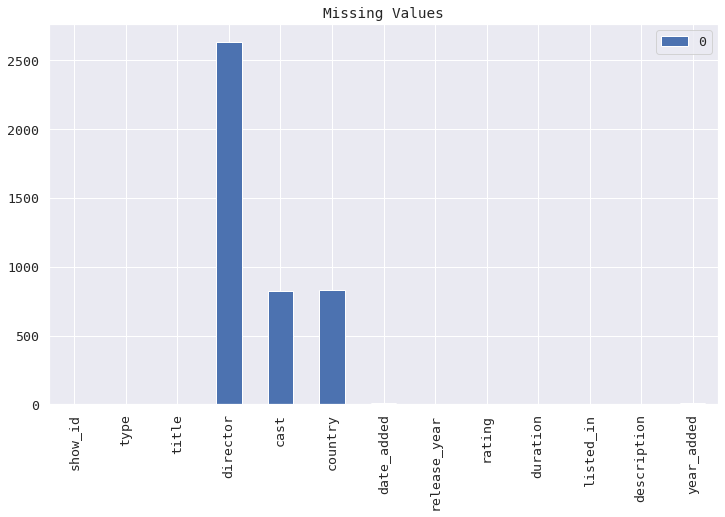

In [17]:
plt.figure(figsize = (10, 7))
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : '22'}
plt.rc('font', **font)
missing.plot( title="Missing Values", figsize=(12,7), kind="bar")

In [18]:
(raw_data.country).mode()

0    United States
dtype: object

In [19]:
raw_data.year_added.mode()

0    2019.0
dtype: float64

In [20]:
#Filling the data with mode for country and year_added
#Filling the columns for director and rating with DNK and TV_MA 
#dropping date added, description and cast
raw_data['rating'] = raw_data['rating'].fillna('TV-MA')
raw_data['country'] = raw_data['country'].fillna('United States')
raw_data['year_added'] = raw_data['year_added'].fillna(2019)
raw_data['director'] = raw_data['director'].fillna('DNK')

In [21]:
raw_data.drop(['date_added'],axis=1,inplace=True)
raw_data.drop([ 'description'], axis=1, inplace=True)
raw_data.dropna(subset =['cast'],inplace=True)

In [22]:
raw_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        3
listed_in       0
year_added      0
dtype: int64

In [23]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7982 entries, 1 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7982 non-null   object 
 1   type          7982 non-null   object 
 2   title         7982 non-null   object 
 3   director      7982 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7982 non-null   object 
 6   release_year  7982 non-null   int64  
 7   rating        7982 non-null   object 
 8   duration      7979 non-null   object 
 9   listed_in     7982 non-null   object 
 10  year_added    7982 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 748.3+ KB


In [24]:
df=raw_data.reset_index()

In [25]:
#Exploratory Data Analysis
print(df['release_year'].min(), df['release_year'].max())

1942 2021


In [26]:
df_tv_show = df[df['type'] == 'TV Show']
df_movies = df[df['type'] == 'Movie']

In [27]:
df

,index,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,year_added
0,1,s2,TV Show,Blood & Water,DNK,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0
1,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0
2,4,s5,TV Show,Kota Factory,DNK,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0
3,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021.0
4,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91 min,Children & Family Movies,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7977,8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",2016.0
7978,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019.0
7979,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",2019.0
7980,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies",2020.0


In [28]:
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : '22'}
plt.rc( 'font',**font)

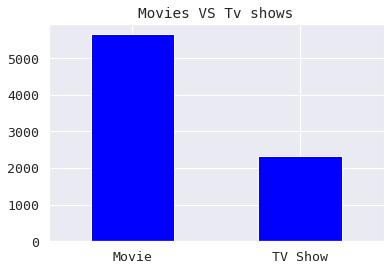

In [29]:
#checking number of movies and TV shows
vs = df.type.value_counts()
vs.plot.bar(color  ="blue")
plt.xticks(rotation = 0)
plt.title("Movies VS Tv shows")
plt.show()

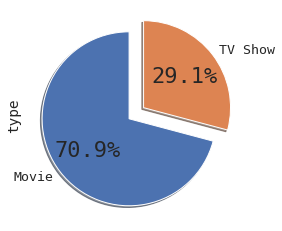

In [30]:
vs.plot.pie( autopct='%1.1f%%', shadow=True, startangle=90 , explode = (0.07,0.14) )
plt.show()

In [31]:
#contry analysis..comparing which country produces more content
df['country'] = df['country'].apply(lambda x: x.split(",")[0])

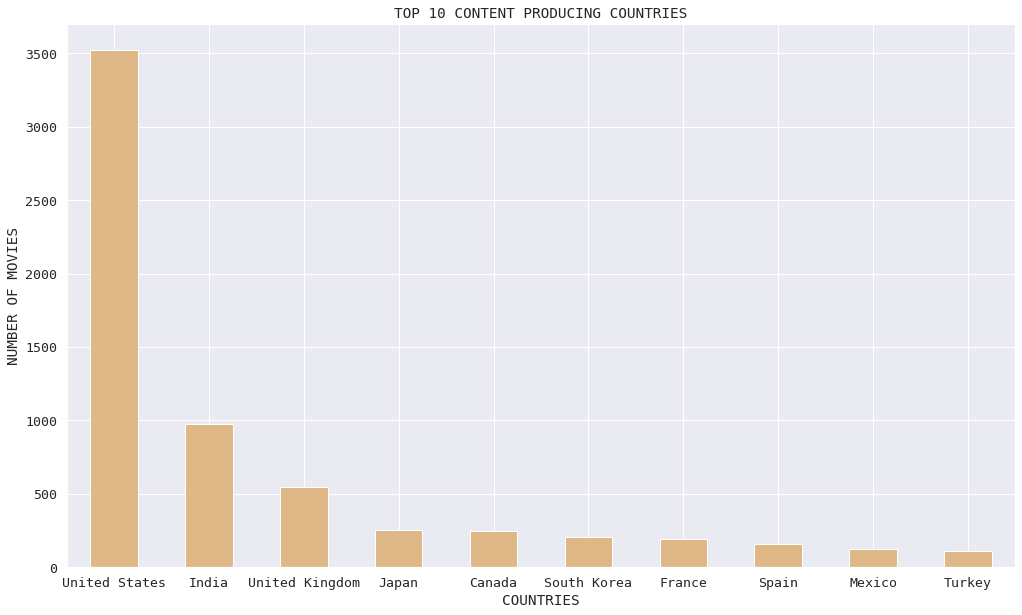

In [32]:
cont = df.country.value_counts().head(10)
plt.figure(figsize = (17, 10) )
cont.plot.bar(color = 'burlywood' )
plt.xticks(rotation = 0)
plt.xlabel("COUNTRIES")
plt.ylabel("NUMBER OF MOVIES")
plt.title("TOP 10 CONTENT PRODUCING COUNTRIES")
plt.show()

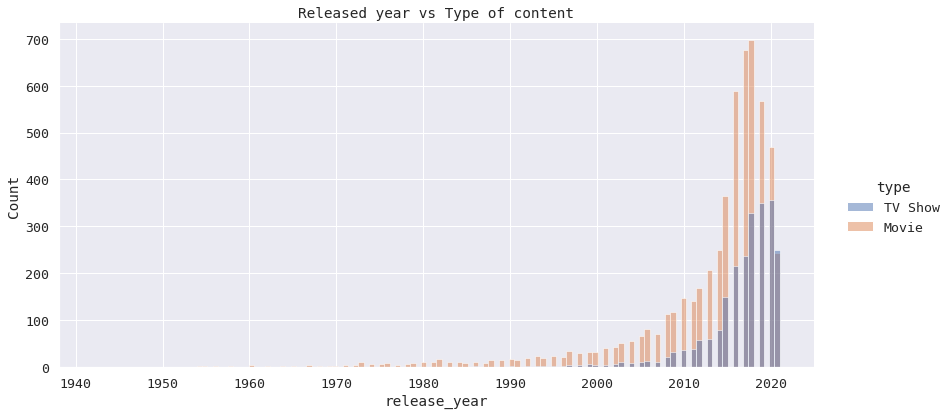

In [33]:
sns.displot(df,x='release_year',hue='type', height=6 ,  aspect=2)
plt.title('Released year vs Type of content')
plt.show()

In [34]:
#checking release years
fig = px.strip(df, x='release_year', y="type", orientation="h", color="type")
fig.show()

Text(18.620596296296313, 0.5, 'Count')

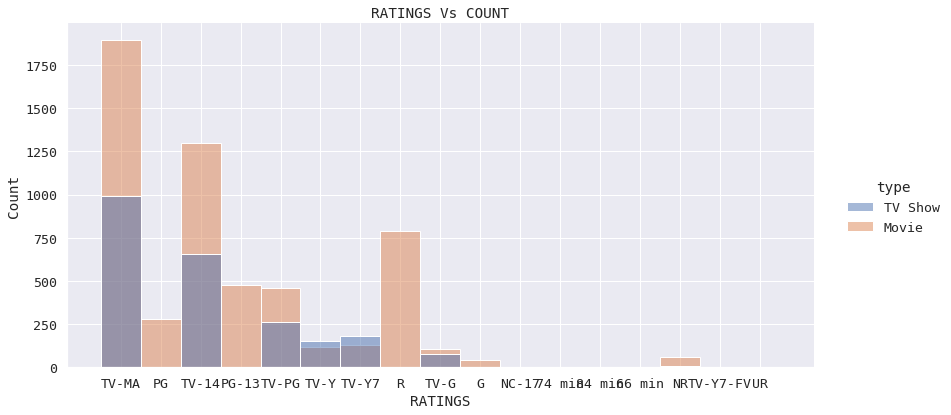

In [35]:
#content and rating
sns.displot(df,x='rating', hue ="type",height=6 ,  aspect=2  )
plt.title('RATINGS Vs COUNT')
plt.xlabel("RATINGS")
plt.ylabel("Count")

In [36]:
#Replacing rating index for better understanding
df['rating'] = df['rating'].replace({'TV-PG': 'Kids','TV-MA': 'Adults','TV-Y7-FV':'Kids','TV-Y7': 'Kids','TV-14': 'Teens','R': 'Adults',
                                         'TV-Y': 'Kids','NR': 'Adults','PG-13': 'Teens', 'TV-G': 'Kids', 
                                         'PG': 'Kids', 'G': 'Kids','UR': 'Adults',
                                         'NC-17': 'Adults'})

In [37]:
df.rating.value_counts()

Adults    3744
Teens     2432
Kids      1803
84 min       1
74 min       1
66 min       1
Name: rating, dtype: int64

Text(19.992715555555563, 0.5, 'COUNT')

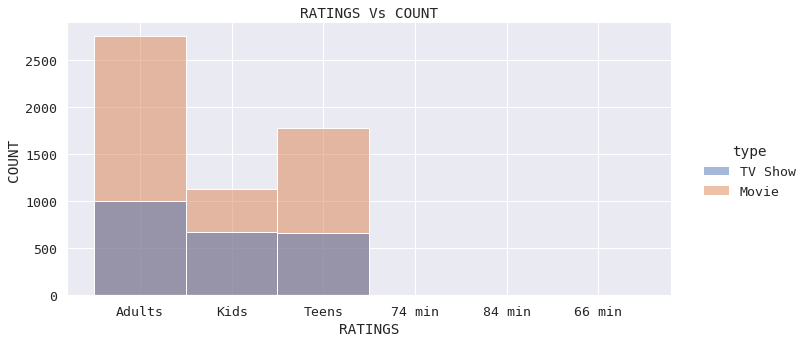

In [38]:
sns.displot(df,x='rating', hue ="type",height=5,  aspect=2 )
plt.title('RATINGS Vs COUNT')
plt.xlabel("RATINGS")
plt.ylabel("COUNT")

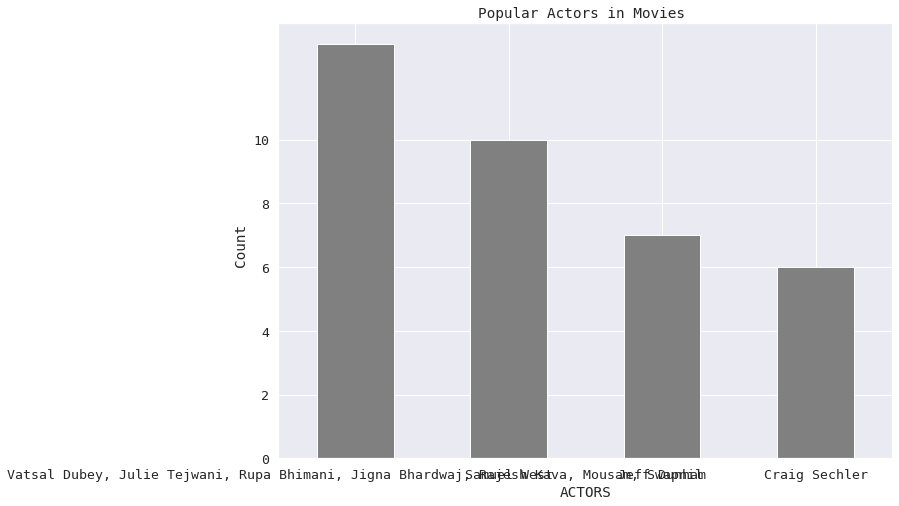

In [39]:
#There is wrong data entered in rating i.e duration data is entered in rating which are 74min, 84min and 66min
#Popular Actors
plt.figure(figsize = (11, 8))
df_movies.cast.value_counts().head(4).plot.bar(color = 'grey')
plt.xlabel("ACTORS")
plt.xticks(rotation =0)
plt.yticks([int(n) for n in range(0,12,2)])
plt.ylabel("Count ")
plt.title("Popular Actors in Movies " )
plt.show()

In [40]:
#splitting genre because there are more genre seperated by ','
df['genre'] = df['listed_in'].apply(lambda x: x.split(",")[0] )

In [41]:
plt.figure(figsize= (10 ,8))
genre = df.genre.value_counts() 
genre

Dramas                          1592
Comedies                        1204
Action & Adventure               853
International TV Shows           743
Children & Family Movies         573
Documentaries                    421
Kids' TV                         350
Stand-Up Comedy                  333
Crime TV Shows                   333
Horror Movies                    275
British TV Shows                 208
Anime Series                     173
International Movies             127
TV Comedies                      120
Docuseries                       107
Reality TV                        78
Classic Movies                    73
TV Dramas                         67
Thrillers                         65
Movies                            53
TV Action & Adventure             39
Romantic TV Shows                 32
Stand-Up Comedy & Talk Shows      29
Classic & Cult TV                 22
Independent Movies                20
Anime Features                    19
Music & Musicals                  18
S

<Figure size 720x576 with 0 Axes>

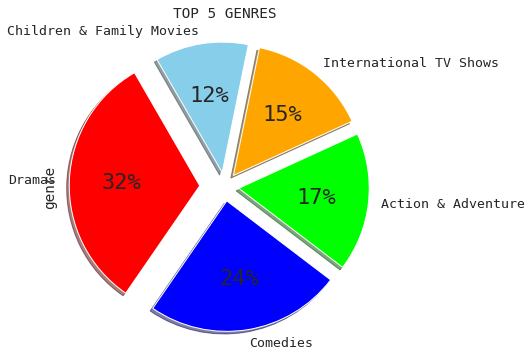

In [42]:
explode = [0.19, 0.11, 0.11, 0.11, 0.11]
colors = ['red' , 'blue' , 'lime','orange' ,'skyblue']

df.genre.value_counts()[:5].plot(kind='pie',figsize=(6,6),title = "TOP 5 GENRES"  , autopct='%.0f%%', shadow = True,startangle = 120,colors = colors, explode = explode  )

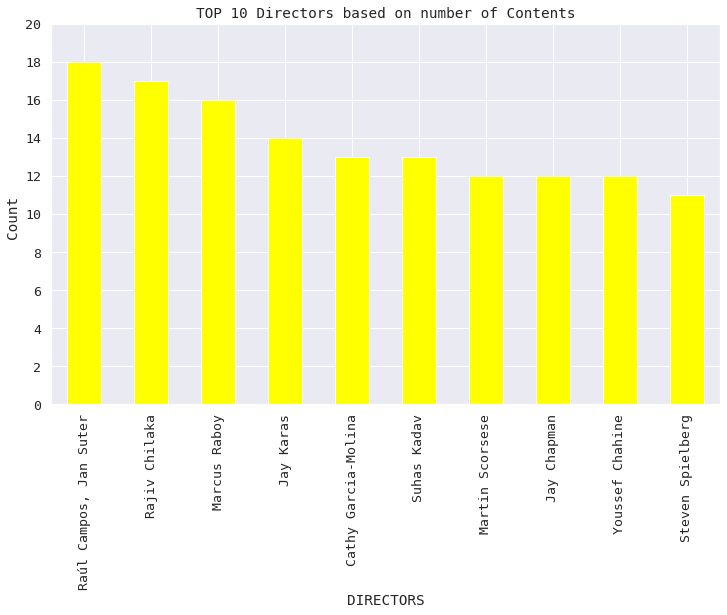

Raúl Campos, Jan Suter    18
Rajiv Chilaka             17
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Suhas Kadav               13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

In [44]:
dir = df.director.value_counts()[1:11]
dir.plot(kind='bar',figsize=(12,7), title= "TOP 10 Directors based on number of Contents" , color = 'yellow')
plt.ylabel("Count ")
plt.xlabel("DIRECTORS")
plt.yticks([int(n) for n in range(0,22,2)] )
plt.show()
dir

In [45]:
#genres and ratings
fig = px.density_heatmap(df, x="genre", y="rating", marginal_x="rug", marginal_y="histogram" )
plt.figure(figsize= (16,10))
fig.show()

<Figure size 1152x720 with 0 Axes>

In [46]:
fig = px.parallel_categories(df,dimensions=['type', 'rating'])
fig.show()